In [56]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Fit the scaler to the data and simultaneously transform the data
crypto_scaled = scaler.fit_transform(df_market_data)

# The variable crypto_scaled now holds the scaled data
print(crypto_scaled)

[[ 5.08529366e-01  4.93193071e-01  7.72200433e-01  2.35459633e-01
  -6.74950963e-02 -3.55953481e-01 -2.51636882e-01]
 [ 1.85445894e-01  9.34445040e-01  5.58692121e-01 -5.43409317e-02
  -2.73482725e-01 -1.15759474e-01 -1.99352110e-01]
 [ 2.17739616e-02 -7.06336853e-01 -2.16804207e-02 -6.10301536e-02
   8.00452481e-03 -5.50246924e-01 -2.82060506e-01]
 [-4.07643829e-02 -8.10928066e-01  2.49457974e-01 -5.03879651e-02
  -3.73164019e-01 -4.58258816e-01 -2.95546142e-01]
 [ 1.19303608e+00  2.00095907e+00  1.76061001e+00  5.45842065e-01
  -2.91202870e-01 -4.99847761e-01 -2.70316950e-01]
 [ 8.91870708e-01  1.32729453e+00  8.00214184e-01 -5.71478992e-02
   7.78653106e-01 -1.88231917e-01 -2.25532605e-01]
 [ 1.13972400e-02  2.57225091e+00  1.10164693e+00 -4.90495415e-01
  -9.31954023e-01  3.87758986e-01 -1.82843995e-02]
 [ 1.02529802e-01  1.50800146e+00  6.48885061e-01  3.28959245e-01
  -4.86348899e-01  6.50796233e-02 -1.55428416e-01]
 [ 7.74971820e-02  3.34296562e-01  8.58519864e-01 -1.26464730e-0

In [7]:
column_names = [
    'price_change_percentage_24h', 
    'price_change_percentage_7d', 
    'price_change_percentage_14d', 
    'price_change_percentage_30d', 
    'price_change_percentage_60d', 
    'price_change_percentage_200d', 
    'price_change_percentage_1y'
]

# Create a DataFrame with the scaled data

crypto_transformed_df = pd.DataFrame(crypto_scaled, columns=column_names)

# Copy the crypto names from the original data

coin_names = df_market_data.index.to_list()

# Set the coinid column as index

crypto_transformed_df['coin_id'] = coin_names
crypto_transformed_df.set_index('coin_id', inplace=True)

# Display sample data
crypto_transformed_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [12]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):

#Inside the loop
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)  
    
    # 2. Fit the model to the data
    kmeans.fit(crypto_transformed_df)
    
    # 3. Append the model's inertia to the inertia list
    inertia_values.append(kmeans.inertia_)

    print(inertia_values)



c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0]


c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 195.82021818036043]


c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 195.82021818036043, 123.19048183836958]


c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975]


c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.22036416927935]


c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.22036416927935, 52.82981853382919]


c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.22036416927935, 52.82981853382919, 43.78643495414179]


c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.22036416927935, 52.82981853382919, 43.78643495414179, 37.52773961065439]


c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.22036416927935, 52.82981853382919, 43.78643495414179, 37.52773961065439, 33.07092554993108]


c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.22036416927935, 52.82981853382919, 43.78643495414179, 37.52773961065439, 33.07092554993108, 28.9890732836795]


c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.22036416927935, 52.82981853382919, 43.78643495414179, 37.52773961065439, 33.07092554993108, 28.9890732836795, 24.532527356516862]


In [14]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {'k': k_values, 'inertia': inertia_values}
# Create a DataFrame with the data to plot the Elbow curve

elbow_curve_df = pd.DataFrame(elbow_data)

elbow_curve_df


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.220364
5,6,52.829819
6,7,43.786435
7,8,37.527740
8,9,33.070926
9,10,28.989073


In [15]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_curve_df.hvplot.line(
    x='k',                  # Specify 'k' column for x-axis
    y='inertia',            # Specify 'inertia' column for y-axis
    title='Elbow Curve',    # Title of the plot
    xticks=k_values         # Provide the list of k-values for x-axis ticks
)

# Display the plot
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4, as determined by the Elbow Method. This is where the Elbow Curve starts to plateau, indicating that increasing the number of clusters beyond this point does not significantly improve the compactness of the clusters. Hence, k=4 provides a good balance between the number of clusters and the variance explained by them.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [16]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=1)

In [18]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(crypto_transformed_df)

c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = kmeans_model.predict(crypto_transformed_df)

# Print the resulting array of cluster values.
k_4


array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [24]:
# Create a copy of the DataFrame
predicted_clusters= crypto_transformed_df.copy()

In [26]:
# Add a new column to the DataFrame with the predicted clusters
crypto_transformed_df['cluster_label'] = k_4

# Display sample data

crypto_transformed_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_label
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,3
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,3


In [27]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create a scatter plot
scatter_plot = crypto_transformed_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster_label',  
    hover_cols=['crypto_name'],  
    title='Cryptocurrency Clusters: 24h vs 7d Price Change'
)

# Display the scatter plot
scatter_plot


:NdOverlay   [cluster_label]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [28]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [32]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

crypto_pca = pca_model.fit_transform(crypto_transformed_df)
crypto_pca_df = pd.DataFrame(
    data=crypto_pca,
    columns=['principal_component_1', 'principal_component_2', 'principal_component_3'],
    index=crypto_transformed_df.index  
)

# View the first five rows of the DataFrame. 
crypto_pca_df[:5]

,principal_component_1,principal_component_2,principal_component_3
coin_id,,,
bitcoin,-1.585139,0.134394,0.545621
ethereum,-1.322581,0.054494,1.115709
tether,0.266335,-0.536409,-0.796946
ripple,0.257225,-0.592013,-0.646529
bitcoin-cash,-2.952250,0.422372,1.267894


In [33]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance_ratio = pca_model.explained_variance_ratio_

for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {variance:.2f}")


Principal Component 1: 0.37
Principal Component 2: 0.32
Principal Component 3: 0.19


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is: 0.88

In [39]:
# Create a new DataFrame with the PCA data.
cluster_pca_df = pd.DataFrame(
    crypto_pca,
    columns = ["PCA1", "PCA2", "PCA3"]
)
cluster_pca_df

# Copy the crypto names from the original data
cluster_pca_df['coin_id'] = list(predicted_clusters.index)
cluster_pca_df

# Set the coinid column as index
cluster_pca_df = cluster_pca_df.set_index('coin_id')

# Display sample data
cluster_pca_df


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-1.585139,0.134394,0.545621
ethereum,-1.322581,0.054494,1.115709
tether,0.266335,-0.536409,-0.796946
ripple,0.257225,-0.592013,-0.646529
bitcoin-cash,-2.952250,0.422372,1.267894
binancecoin,-1.975484,0.528219,0.670145
chainlink,-1.671906,0.178423,2.718598
cardano,-1.539740,0.324517,1.497226
litecoin,-1.347533,-0.132837,0.791063


---

### Find the Best Value for k Using the PCA Data

In [40]:
# Create a list with k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list to verify
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [71]:
# Initialize an empty list to hold the inertia scores
inertia_scores = []

# Loop over a range of k values to calculate inertia for each
for k_value in k_values:
    # Instantiate a KMeans model with k clusters
    kmeans_model = KMeans(n_clusters=k_value, random_state=1)
    # Fit the model to the PCA-reduced data
    kmeans_model.fit(cluster_pca_df)
    # Store the inertia of the fitted model
    inertia_scores.append(kmeans_model.inertia_)





c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

In [76]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k": k_values, "inertia": inertia_scores}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data2)
elbow_df2


,k,inertia
0,1,287.007838
1,2,196.268358
2,3,111.972027
3,4,43.205879
4,5,33.042435
5,6,24.347640
6,7,19.777320
7,8,15.868897
8,9,12.351058
9,10,10.169351


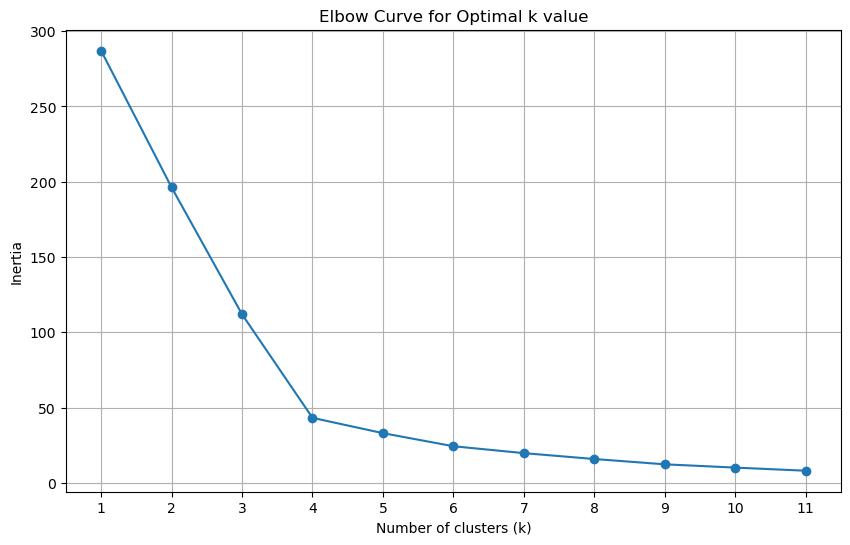

In [74]:

# Plot the elbow curve using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_scores, '-o')
plt.title('Elbow Curve for Optimal k value')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k using the PCA data, according to the elbow method, appears to be k=4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** There is no difference in the best k value between the PCA-reduced data and the original data. They both are k=4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [88]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)

In [89]:
# Fit the K-Means model using the PCA data

kmeans.fit(cluster_pca_df)



c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lois\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [90]:
# Predict the clusters for each observation
kk = kmeans.predict(cluster_pca_df)

# Print the predicted clusters
kk


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 3, 2, 2, 2, 2])

In [92]:
# Create a copy of the DataFrame to avoid modifying the original one
pca_data_with_clusters = cluster_pca_df.copy()

# Add the predicted cluster labels to the new DataFrame
pca_data_with_clusters['cluster'] = predicted_clusters

# Display the first few rows of the DataFrame to verify the new column is added
pca_data_with_clusters


,PCA1,PCA2,PCA3,cluster
coin_id,,,,
bitcoin,-1.585139,0.134394,0.545621,0
ethereum,-1.322581,0.054494,1.115709,0
tether,0.266335,-0.536409,-0.796946,2
ripple,0.257225,-0.592013,-0.646529,2
bitcoin-cash,-2.952250,0.422372,1.267894,0
binancecoin,-1.975484,0.528219,0.670145,0
chainlink,-1.671906,0.178423,2.718598,0
cardano,-1.539740,0.324517,1.497226,0
litecoin,-1.347533,-0.132837,0.791063,0


In [98]:
# Create a scatter plot using hvPlot
pca_data_with_clusters.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by = 'cluster',
    hover_cols='coin_id'
)


:NdOverlay   [cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [101]:
# Composite plot to contrast the Elbow curves

# Plot the Elbow curve for the original data
elbow_curve_original = elbow_curve_df.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve for Original Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    color='blue'
)

# Plot the Elbow curve for the PCA-reduced data
elbow_curve_pca = elbow_df2.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve for PCA-Reduced Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    color='orange'
)

# Create a composite plot by overlaying the two plots
composite_elbow_curve = elbow_curve_original * elbow_curve_pca

# Display the composite plot
composite_elbow_curve

:Overlay
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [110]:
# Composite plot to contrast the clusters
# Scatter plot for original data clusters
scatter_original = crypto_transformed_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster_label',
    title='Clusters in Original Data',
    width=400,
    height=400
)

# Scatter plot for PCA-reduced data clusters
scatter_pca = pca_data_with_clusters.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by = 'cluster',
    title='Clusters in PCA-Reduced Data',
    width=400,
    height=400
)

# Combine the plots side by side
composite_clusters = scatter_original + scatter_pca

# Display the composite plot
composite_clusters

:Layout
   .NdOverlay.I  :NdOverlay   [cluster_label]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PCA1]   (PCA2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** In response to the use of PCA for data clustering with K-Means, the results indicated more distinct and compact clusters. Additionally, there was a noticeable increase in the number of data points grouped into clusters 0 and 1 compared to the clustering outcome derived from the original dataset without PCA.